### This is the Exploratory Data Analysis of matches.csv file

In [1]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import random

In [2]:
matches = pd.read_csv('matches.csv')
matches = pd.DataFrame(matches)
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [3]:
#No. of Rows and Columns
matches.shape

(1095, 20)

Count of cities and the number of matches played in the city

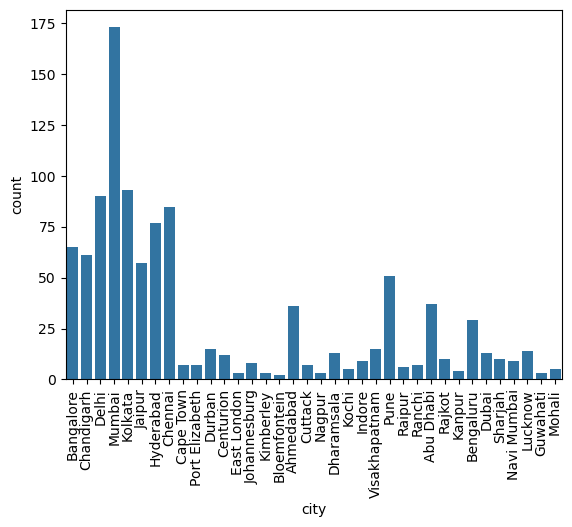

In [4]:
#seaborn
sns.countplot(data=matches, x=matches.city)
plt.xticks( rotation=90)
plt.show()
#plotly
fig = px.bar(matches, x='city')
fig.show()

Number of Matches won by IPL teams

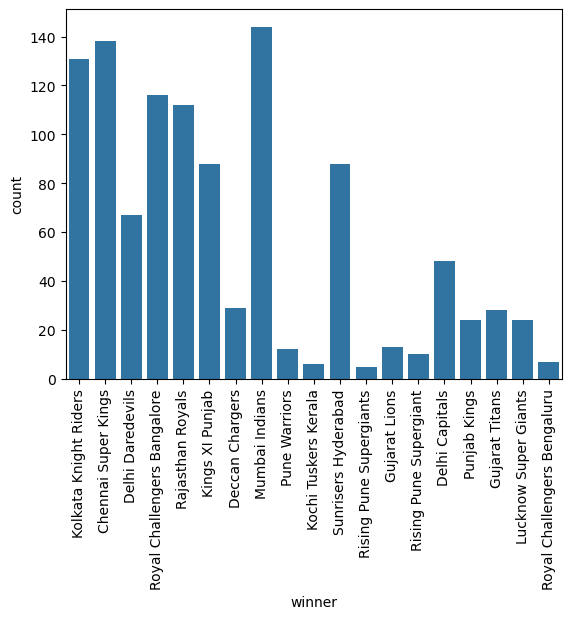

Number of Matches won by each team in Sorted Order 

                           Team Number of matches won
10               Mumbai Indians                   144
0           Chennai Super Kings                   138
8         Kolkata Knight Riders                   131
16  Royal Challengers Bangalore                   116
13             Rajasthan Royals                   112
6               Kings XI Punjab                    88
18          Sunrisers Hyderabad                    88
3              Delhi Daredevils                    67
2                Delhi Capitals                    48
1               Deccan Chargers                    29
5                Gujarat Titans                    28
12                 Punjab Kings                    24
9          Lucknow Super Giants                    24
4                 Gujarat Lions                    13
11                Pune Warriors                    12
14       Rising Pune Supergiant                    10
17  Royal Challengers Bengalu

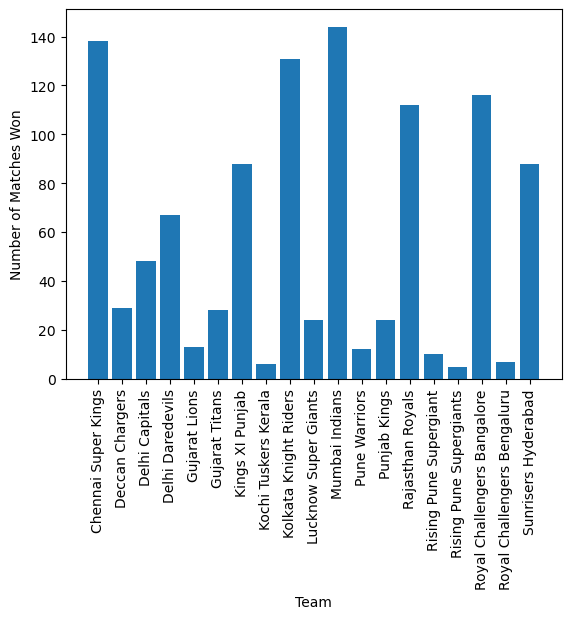

In [5]:
#seaborn
winner = pd.DataFrame(matches.groupby(['winner']).count())
sns.countplot(data=matches, x='winner')
plt.xticks(rotation=90)
plt.show()

no_of_matches_won = pd.DataFrame([winner.index,winner['id']]).T
no_of_matches_won.rename({0:'Team', 1: 'Number of matches won'}, inplace=True,axis=1)
# no_of_matches_won.reset_index(inplace=True)
print("Number of Matches won by each team in Sorted Order \n")

print(no_of_matches_won.sort_values(by=['Number of matches won'], ascending=False)) 
print("\n\n\n")


#matplotlib
plt.bar(x=no_of_matches_won['Team'], height=no_of_matches_won['Number of matches won'])
plt.xlabel("Team")
plt.ylabel("Number of Matches Won")
plt.xticks(rotation=90)
plt.show()



### Total Number of Matches till 2024

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner  ...  \
0        Kolkata Knight 

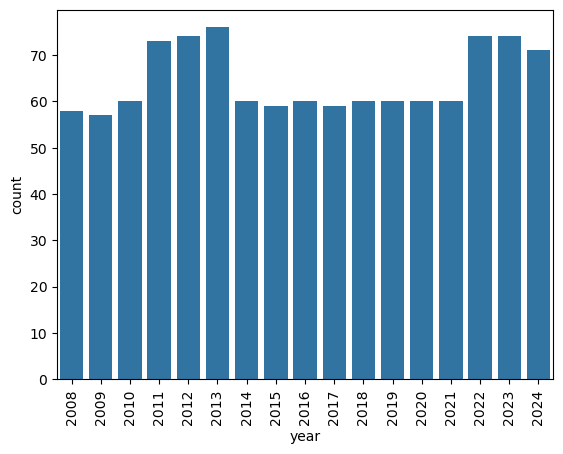

In [6]:

matches['year'] = pd.DatetimeIndex(matches['date']).year
print(matches.head())
sns.countplot(data=matches, x='year', width=0.8)
plt.xticks(rotation=90)
plt.show()

### Does winning toss impacts match results?

In [7]:
trace1 = go.Bar(x=matches["winner"].value_counts().index, y=matches["winner"].value_counts().values,name="match win")
trace2 = go.Bar(x=matches["toss_winner"].value_counts().index, y=matches["toss_winner"].value_counts().values,name="toss win")

data = [trace1, trace2]
layout = go.Layout(title="Total number of wins for every team till 2024",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Number of Matches"),
                   legend=dict(x=1.0, y=0.5)
                   ,barmode="group")

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

### Toss/Win Ratio

In [8]:
#Generating random colors
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

random_colors(5)

['#9B5600', '#7BDA59', '#0EB39F', '#91BA3B', '#28E208']

In [9]:
total_matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()
# total_matches_played

toss_won = matches['toss_winner'].value_counts()
toss_win_success_rate = (toss_won / total_matches_played) * 100
# toss_win_success_rate
toss_win_success_rate_sort = toss_win_success_rate.sort_values(ascending=False)
# toss_win_success_rate_sort

data = [go.Bar(
    x = toss_win_success_rate.sort_values(ascending=False).index,
    y = toss_win_success_rate.sort_values(ascending=False).values,
    marker = dict(color = random_colors(len(toss_win_success_rate.sort_values(ascending=False).index)),line=dict(color='#000000', width=1.5))
    )]

layout = go.Layout(title="Toss Win success ratio.",
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Number of Matches"))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

### Most Player of the match awards

In [10]:
data = [go.Bar(
    x = matches['player_of_match'].value_counts()[:20].index,
    y = matches['player_of_match'].value_counts()[:20].values,
    marker = dict(color = random_colors(20),line=dict(color='#000000', width=0.5))
)]


layout = go.Layout(title="Total number of Player of the match. ",
                   xaxis=dict(title="Name of the top 20 Player of the match."),
                   yaxis=dict(title="Number of Player of the match"))

# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)


### Success rate of winning matches

In [11]:
matches_won = matches.groupby('winner').count()
# matches_won

total_matches = matches['team1'].value_counts() + matches['team2'].value_counts()
# total_matches

matches_won['Total Matches'] = total_matches

win_df = matches_won[["Total Matches", "result"]]
success_ratio = round((matches_won['id']/total_matches), 4)*100
success_ratio_sort = success_ratio.sort_values(ascending = False)

data = [go.Bar(
    x=success_ratio_sort.index,
    y=success_ratio_sort.values,
    marker = dict(color=random_colors(len(success_ratio_sort.index)),line=dict(color='#000000', width=1.5)))]

layout = go.Layout(title='Success Rate of Teams',
                   xaxis=dict(title="Teams"),
                   yaxis=dict(title="Success Rate of winning"))


fig = go.Figure(data=data, layout=layout)
fig.show()




### Most title wins

In [12]:
each_season_winner = matches.groupby('year')[['season', 'winner']].tail(1)
each_season_winner_sort = each_season_winner.sort_values(by='season',ascending=True)
data = [go.Bar(
    x = each_season_winner_sort['winner'].value_counts().index,
    y = each_season_winner_sort['winner'].value_counts().values,
    marker = dict(color=random_colors(len(each_season_winner_sort.value_counts().index)),line=dict(color='#000000', width=1.5)))]

layout = go.Layout(title="Most Title Wins",
                  xaxis=dict(title="Teams"),
                  yaxis=dict(title="Number of Seasons won."))

fig = go.Figure(data=data, layout=layout)

fig.show()

In [13]:
### More EDA is possible for this file, I'll do it in the future